In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [3]:
data=pd.read_csv('hacktrain.csv')
data2=pd.read_csv('hacktest.csv')
print(data.head())

   Unnamed: 0  ID  class  20150720_N  20150602_N  20150517_N  20150501_N  \
0           0   1  water    637.5950     658.668   -1882.030    -1924.36   
1           1   2  water    634.2400     593.705   -1625.790    -1672.32   
2           3   4  water     58.0174   -1599.160         NaN    -1052.63   
3           4   5  water     72.5180         NaN     380.436    -1256.93   
4           7   8  water   1136.4400         NaN         NaN     1647.83   

   20150415_N  20150330_N  20150314_N  ...  20140610_N  20140525_N  \
0     997.904   -1739.990     630.087  ...         NaN   -1043.160   
1     914.198    -692.386     707.626  ...         NaN    -933.934   
2         NaN   -1564.630         NaN  ...    -1025.88     368.622   
3     515.805   -1413.180    -802.942  ...    -1813.95     155.624   
4    1935.800         NaN    2158.980  ...     1535.00    1959.430   

   20140509_N  20140423_N  20140407_N  20140322_N  20140218_N  20140202_N  \
0   -1942.490     267.138         NaN        

In [4]:
data.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

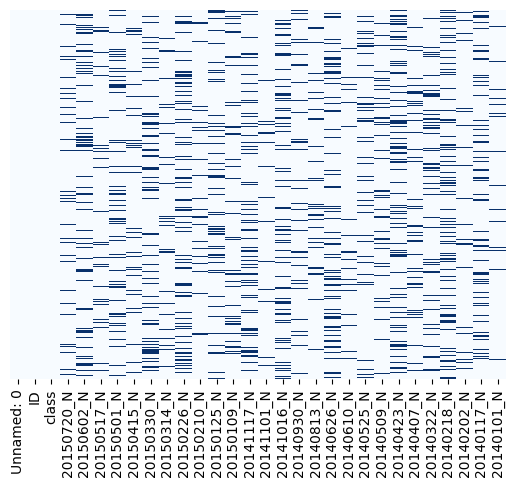

In [5]:
sns.heatmap(data.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=data.columns)
plt.show()

In [6]:
data=data.drop(columns=["Unnamed: 0"])

In [7]:
data2=data2.drop(columns=["Unnamed: 0"])

In [8]:
data


,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,943.698,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,1401.970,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,NaN,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,770.469,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [9]:
feature_cols = [col for col in data.columns if col.endswith("_N")]


In [10]:
imputer = SimpleImputer(strategy='median')
data[feature_cols] = imputer.fit_transform(data[feature_cols])
data2[feature_cols] = imputer.transform(data2[feature_cols])



<Axes: >

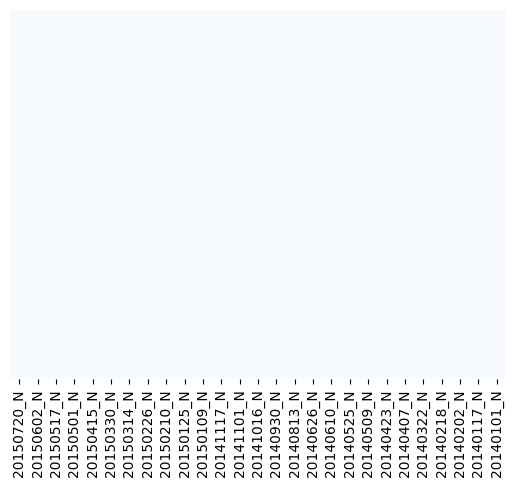

In [11]:
sns.heatmap(data[feature_cols].isnull(), cmap='Blues', cbar=False,
            yticklabels=False, xticklabels=data[feature_cols].columns)

In [12]:
le = LabelEncoder()
data['class_encoded'] = le.fit_transform(data['class'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'farm': np.int64(0), 'forest': np.int64(1), 'grass': np.int64(2), 'impervious': np.int64(3), 'orchard': np.int64(4), 'water': np.int64(5)}


In [13]:
data.head()


,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N,class_encoded
0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,5831.120,...,-1043.160,-1942.490,267.138,1183.715,1599.385,211.328,-2203.020,-1180.19,433.906,5
1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075,5
2,4,water,58.0174,-1599.160,4672.000,-1052.63,1586.240,-1564.630,2802.010,729.790,...,368.622,2633.695,-1227.800,304.621,1599.385,369.214,-2202.120,1521.21,-1343.550,5
3,5,water,72.5180,5513.375,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,155.624,2633.695,-924.073,432.150,282.833,298.320,-2197.360,1521.21,-826.727,5
4,8,water,1136.4400,5513.375,4672.000,1647.83,1935.800,5742.485,2158.980,5831.120,...,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140,5


In [14]:
data.drop(columns=["class"])

,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N,class_encoded
0,1,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.990,630.087,5831.120,-1325.640,...,-1043.160,-1942.490,267.138,1183.715,1599.385,211.3280,-2203.020,-1180.19,433.906,5
1,2,634.2400,593.705,-1625.790,-1672.320,914.198,-692.386,707.626,-1670.590,-1408.640,...,-933.934,-625.385,120.059,364.858,476.972,220.8780,-2250.000,-1360.56,524.075,5
2,4,58.0174,-1599.160,4672.000,-1052.630,1586.240,-1564.630,2802.010,729.790,-3162.140,...,368.622,2633.695,-1227.800,304.621,1599.385,369.2140,-2202.120,1521.21,-1343.550,5
3,5,72.5180,5513.375,380.436,-1256.930,515.805,-1413.180,-802.942,683.254,-2829.400,...,155.624,2633.695,-924.073,432.150,282.833,298.3200,-2197.360,1521.21,-826.727,5
4,8,1136.4400,5513.375,4672.000,1647.830,1935.800,5742.485,2158.980,5831.120,1242.870,...,1959.430,-279.317,-384.915,-113.406,1020.720,1660.6500,-116.801,-568.05,-1357.140,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,1207.7000,984.620,4672.000,1166.250,937.478,1072.700,823.896,943.698,944.619,...,1176.600,1044.110,2624.125,369.082,465.843,362.8820,979.795,1521.21,433.659,3
7996,10539,2170.3500,1419.720,1361.000,1478.710,983.911,1262.110,1422.860,1401.970,1372.680,...,2128.970,1379.660,2624.125,762.633,485.204,446.7240,771.747,1589.06,506.936,3
7997,10542,1895.6800,1454.740,4672.000,1033.560,1930.380,1057.150,1471.600,5831.120,2693.630,...,2093.020,1232.110,1190.830,1441.460,1170.880,1095.0000,1818.650,2501.72,1247.770,3
7998,10543,3465.7400,1283.320,413.412,4391.050,1146.820,4473.050,1614.750,770.469,4497.485,...,4047.320,4515.800,433.177,277.296,744.143,969.7115,3759.710,1521.21,388.346,3


class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64

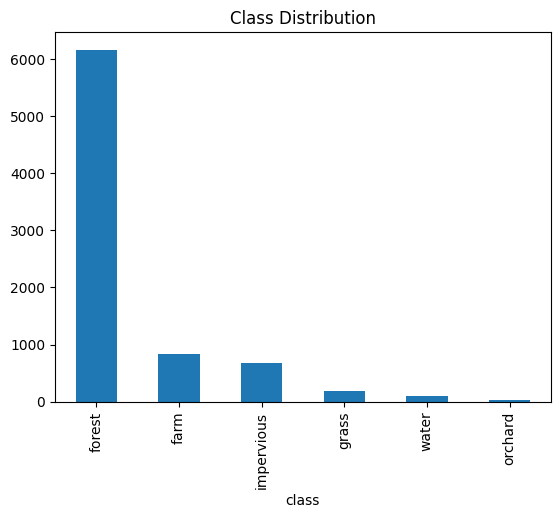

In [15]:
data['class'].value_counts().plot(kind='bar',title='Class Distribution')
data['class'].value_counts()

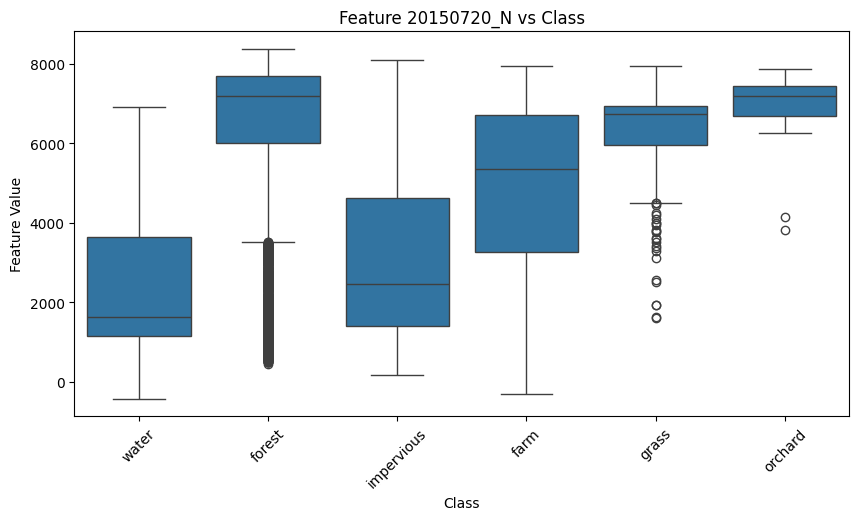

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='class', y='20150720_N', data=data)
plt.title("Feature 20150720_N vs Class")
plt.xlabel("Class")
plt.ylabel("Feature Value")
plt.xticks(rotation=45)
plt.show()

In [17]:
data['feature_mean']=data[feature_cols].mean(axis=1)
data['feature_std']=data[feature_cols].std(axis=1)
data['feature_min']=data[feature_cols].min(axis=1)
data['feature_max']=data[feature_cols].max(axis=1)
data['feature_median']=data[feature_cols].median(axis=1)
data['feature_range']=data['feature_max']-data['feature_min']

data2['feature_mean']=data2[feature_cols].mean(axis=1)
data2['feature_std']=data2[feature_cols].std(axis=1)
data2['feature_min']=data2[feature_cols].min(axis=1)
data2['feature_max']=data2[feature_cols].max(axis=1)
data2['feature_median']=data2[feature_cols].median(axis=1)
data2['feature_range']=data2['feature_max']-data2['feature_min']

In [18]:
data['delta_first_last'] = data[feature_cols].iloc[:, -1] - data[feature_cols].iloc[:, 0]
data['mean_std_ratio'] = data['feature_mean'] / (data['feature_std'] + 1e-6)

data2['delta_first_last'] = data2[feature_cols].iloc[:, -1] - data2[feature_cols].iloc[:, 0]
data2['mean_std_ratio'] = data2['feature_mean'] / (data2['feature_std'] + 1e-6)

In [19]:
data

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140101_N,class_encoded,feature_mean,feature_std,feature_min,feature_max,feature_median,feature_range,delta_first_last,mean_std_ratio
0,1,water,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.990,630.087,5831.120,...,433.906,5,274.827407,1917.252393,-2203.0200,5831.120,433.906,8034.1400,-203.6890,0.143344
1,2,water,634.2400,593.705,-1625.790,-1672.320,914.198,-692.386,707.626,-1670.590,...,524.075,5,-40.123293,1447.052792,-2250.0000,5484.905,214.200,7734.9050,-110.1650,-0.027728
2,4,water,58.0174,-1599.160,4672.000,-1052.630,1586.240,-1564.630,2802.010,729.790,...,-1343.550,5,529.786533,2105.790468,-3162.1400,6518.745,369.214,9680.8850,-1401.5674,0.251586
3,5,water,72.5180,5513.375,380.436,-1256.930,515.805,-1413.180,-802.942,683.254,...,-826.727,5,100.043630,1604.360923,-2829.4000,5513.375,298.320,8342.7750,-899.2450,0.062357
4,8,water,1136.4400,5513.375,4672.000,1647.830,1935.800,5742.485,2158.980,5831.120,...,-1357.140,5,1398.807778,2113.746959,-2646.0500,5831.120,1242.870,8477.1700,-2493.5800,0.661767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,impervious,1207.7000,984.620,4672.000,1166.250,937.478,1072.700,823.896,943.698,...,433.659,3,1204.148889,857.741819,362.8820,4672.000,1044.110,4309.1180,-774.0410,1.403859
7996,10539,impervious,2170.3500,1419.720,1361.000,1478.710,983.911,1262.110,1422.860,1401.970,...,506.936,3,1299.924593,607.662562,336.2890,2624.125,1372.680,2287.8360,-1663.4140,2.139221
7997,10542,impervious,1895.6800,1454.740,4672.000,1033.560,1930.380,1057.150,1471.600,5831.120,...,1247.770,3,1821.615222,1170.688098,447.8680,5831.120,1454.740,5383.2520,-647.9100,1.556021
7998,10543,impervious,3465.7400,1283.320,413.412,4391.050,1146.820,4473.050,1614.750,770.469,...,388.346,3,2296.281056,1673.983732,244.5940,5833.760,1626.540,5589.1660,-3077.3940,1.371746


In [20]:
features=feature_cols+['feature_mean','feature_std','feature_min','feature_max','feature_median','feature_range','delta_first_last','mean_std_ratio']
x=data[features]
y=data['class_encoded']
X_test=data2[features]


In [21]:

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

C:\Users\Mahi Garg\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(x_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.89875
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.52      0.61       161
           1       0.93      0.98      0.95      1231
           2       0.90      0.81      0.85        43
           3       0.79      0.72      0.75       141
           4       0.00      0.00      0.00         6
           5       0.87      0.72      0.79        18

    accuracy                           0.90      1600
   macro avg       0.70      0.62      0.66      1600
weighted avg       0.89      0.90      0.89      1600



In [24]:
test_preds_encoded = model.predict(X_test)


test_preds_labels = le.inverse_transform(test_preds_encoded)

# 📄 Create submission DataFrame
submissionss = pd.DataFrame({
    'ID': data2['ID'],
    'class': test_preds_labels
})

submissionss.to_csv('submissionss.csv',index=False)